In [5]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)
plt.style.use("seaborn-muted")
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({"font.size": 18})

In [2]:
fancy_log = pd.read_csv("log_proba.csv")
simple_log = pd.read_csv("simple_log_mod.csv").iloc[:,1]
rf = pd.read_csv("score_rf.csv").iloc[:,1]
xg = pd.read_csv("score_xgb.csv").iloc[:,1]
truth = pd.read_csv("../15_modified_data/test_data.csv")
truth = truth["nonzero_tip"]
models = {
    "Sklearn Logistic": fancy_log,
    "Interpretable Logistic": simple_log,
    "Random Forest": rf,
    "XGBoost": xg,
}


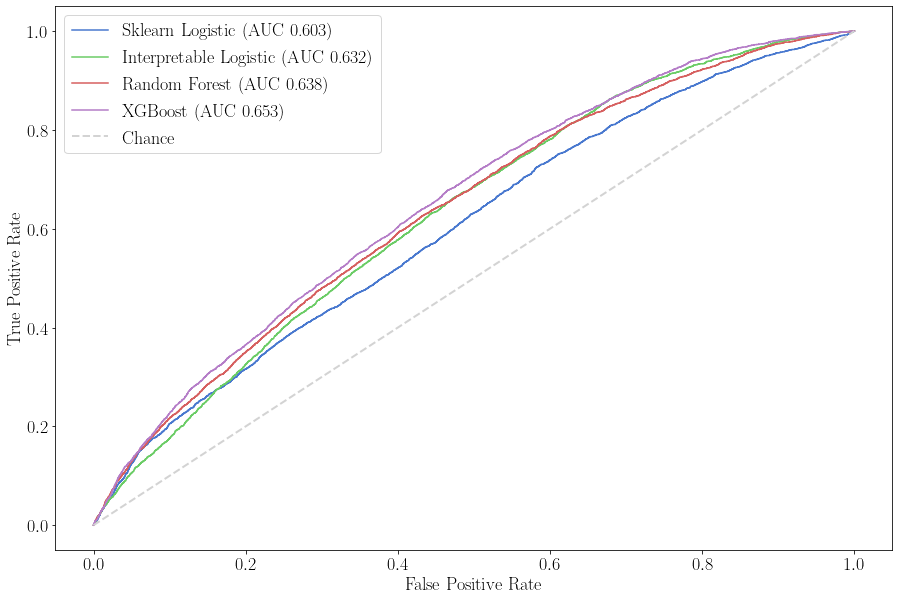

In [3]:
for label, model in models.items():
    auc = roc_auc_score(truth, model)
    fpr, tpr, _ = roc_curve(truth, model)
    auc = roc_auc_score(truth, model)
    plt.plot(fpr, tpr, label = label + f" (AUC {round(auc,3)})")
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="lightgray", label="Chance")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.savefig("../26_images/roc_auc.png", bbox_inches="tight", dpi=400)
plt.show()

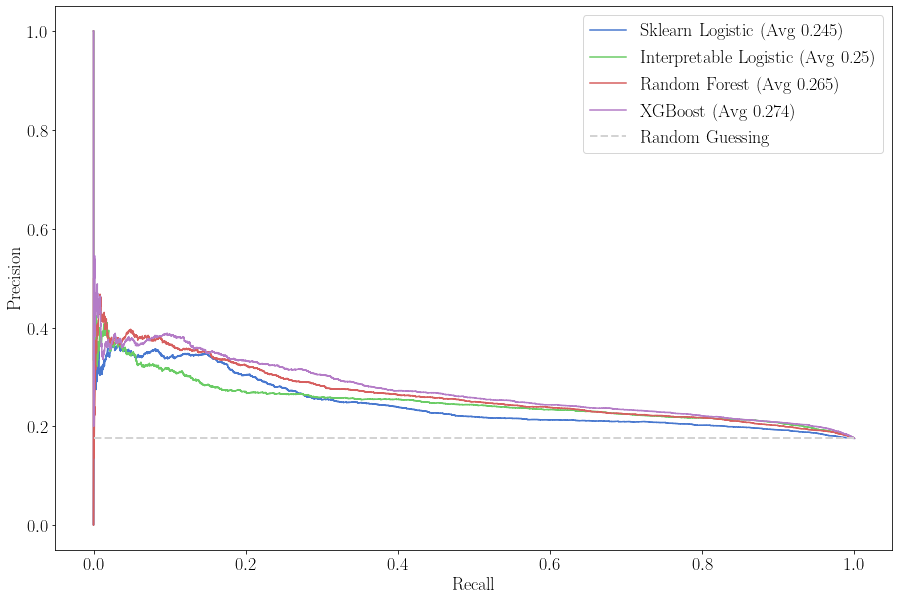

In [15]:
prop = len(truth[truth == 1]) / len(truth)
for label, model in models.items():
    prec, rec, _ = precision_recall_curve(truth, model)
    avg = average_precision_score(truth, model)
    prec = list(prec)
    rec = list(rec)
    if prec[-1] != 0:
        prec.insert(-1, prec[-1])
        rec.insert(-1, 0)
    rec.insert(0, 1)
    prec.insert(0, prop)
    plt.plot(rec, prec, label=label + f" (Avg {round(avg,3)})")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.plot(
    [0, 1],
    [prop, prop],
    linestyle="--",
    lw=2,
    color="lightgray",
    label="Random Guessing",
)
plt.legend()
plt.savefig("../26_images/pr.png", dpi=400, bbox_inches="tight")
plt.show()

In [2]:
import pandas as pd

In [12]:
cov_simple = pd.read_csv("simple_log_mod_post_covid.csv").iloc[:,1]
cov_fancy = pd.read_csv("../logCOVID_probab2.csv")
cov_rf = None
cov_xg = None
truth = pd.read_csv("../15_modified_data/val_post_covid.csv")
truth = truth.loc[truth["year"] == 2020, "nonzero_tip"]
models = {
    "Sklearn Logistic": cov_fancy,
    "Interpretable Logistic": cov_simple,
    "Random Forest": cov_rf,
    "XGBoost": cov_xg,
}

In [ ]:
for label, model in models.items():
    auc = roc_auc_score(truth, model)
    fpr, tpr, _ = roc_curve(truth, model)
    auc = roc_auc_score(truth, model)
    plt.plot(fpr, tpr, label = label + f" (AUC {round(auc,3)})")
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="lightgray", label="Chance")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.savefig("../26_images/roc_auc_cov.png", bbox_inches="tight", dpi=400)
plt.show()